# Pump Breakdown forecast for Predictive maintenance


In this project I have used Tensorflow for Predicting the pump failure in future using past data. The output of this model is classified between two categories, 
- 0 means: there will be no failure (machine status "NORMAL")
- 1 means: there will be a pump failure (machine status "BROKEN"/"RECOVERING").

For this project I have used the dataset which describes the anolog reading from 52 sensors and state of the machine in three classes such as Normal, Broken and Recovering



## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


## 2. Importing Dataset

In [37]:
df = pd.read_csv("sensor.csv")

In [38]:
df.rename(columns={ df.columns[0]: "Samplenr" }, inplace = True)

In [82]:
df.head(80)

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,2018-04-01 01:15:00,2.464410,47.69965,53.125000,45.963540,640.2778,71.52058,13.64294,16.21094,...,39.06250,41.956020,46.29630,40.50926,39.062500,177.9514,69.73380,218.7500,213.8310,NORMAL
76,76,2018-04-01 01:16:00,2.445718,47.56944,53.124996,45.876740,625.4630,70.82310,13.59230,16.16753,...,40.36458,41.087960,46.87500,40.79861,39.062500,177.0833,68.28703,219.6181,209.7801,NORMAL
77,77,2018-04-01 01:17:00,2.456539,47.35243,53.125000,45.876740,623.7268,73.35720,13.61400,16.13136,...,40.88541,40.509260,48.32176,40.79861,38.773150,170.7176,66.55093,221.3542,204.2824,NORMAL
78,78,2018-04-01 01:18:00,2.449653,47.48264,53.168400,45.963540,627.5463,71.57556,13.52720,16.12413,...,40.88541,40.219910,48.90046,41.08796,38.773148,164.9306,65.68287,221.9329,199.3634,NORMAL


## 3. Exploratory Data analysis

**3.1 Checking for null values in dataset**

In [4]:
df.isnull().sum()

Samplenr               0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


Observation: Sensor No. 15 has no readings and for sensor no 50 half og the readings are null

**3.2 Removing Sensor_15 and Sensor_50 Column**

In [117]:
df.drop(['sensor_15','sensor_50'],axis=1, inplace= True)

In [119]:
df.head(2)

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,201.3889,NORMAL


**3.3 Correlation between the sensor data** 

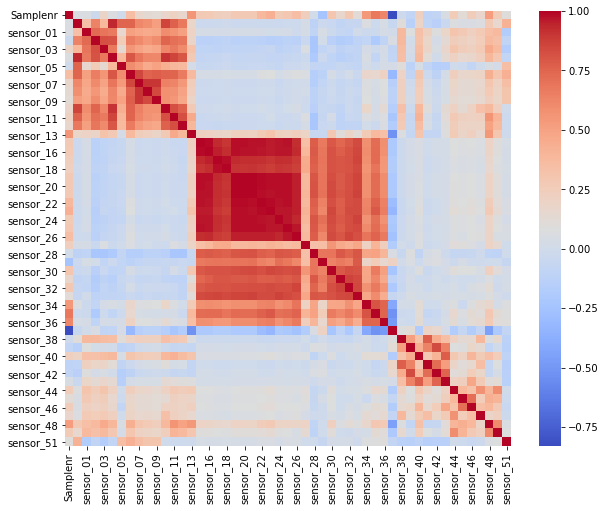

In [120]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.show()

Observation: From above heatmap it is clear that Sensor no. 14 to Sensor no.26 has high correlatio between each other

**3.4 Using Describe method to abserve the statistical information of different sensors**

In [121]:
df.describe()

,Samplenr,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000


**3.5 Observing different machine states**

In [122]:
possible_machine_states = list(df.machine_status.unique())

In [123]:
possible_machine_states

['NORMAL', 'BROKEN', 'RECOVERING']

**3.5.1 Finding the number of rows with "Normal" status**

In [124]:
df_status_NORMAL = df[ df["machine_status"] == "NORMAL" ]

In [125]:
nr_rows_machine_status_NORMAL = df_status_NORMAL.shape[0]

In [126]:
nr_rows_machine_status_NORMAL

205836

In [127]:
nr_rows_total = df.shape[0]

In [128]:
nr_rows_total

220320

In [129]:
percent_machine_status_NORMAL = \
    (nr_rows_machine_status_NORMAL / nr_rows_total) * 100.0

In [130]:
percent_machine_status_NORMAL

93.42592592592592

**3.5.2 Finding the number of rows with "Broken" status**

In [131]:
df_status_BROKEN = df[ df["machine_status"] == "BROKEN" ]

In [132]:
df_status_BROKEN

,Samplenr,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
17155,17155,2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,...,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,324.6528,BROKEN
24510,24510,2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,...,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,183.7384,BROKEN
69318,69318,2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,...,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,257.5231,BROKEN
77790,77790,2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,...,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,267.3611,BROKEN
128040,128040,2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,...,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,NaN,BROKEN
141131,141131,2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,...,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,174.7685,BROKEN
166440,166440,2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,...,36.458330,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,205.7292,BROKEN


In [52]:
nr_rows_machine_status_BROKEN = df_status_BROKEN.shape[0]

In [53]:
print("So {0} times, the pump was broken".format(nr_rows_machine_status_BROKEN))

So 7 times, the pump was broken


In [58]:
row_numbers_machine_BROKEN = list(df_status_BROKEN["Samplenr"].values)

In [59]:
row_numbers_machine_BROKEN

[17155, 24510, 69318, 77790, 128040, 141131, 166440]

**3.5.3 Finding the number of rows with "Recovering" status**

In [54]:
df_status_RECOVERING = df[ df["machine_status"] == "RECOVERING" ]
nr_rows_machine_status_RECOVERING = df_status_RECOVERING.shape[0]

In [115]:
nr_rows_machine_status_RECOVERING

14477

In [55]:
percent_machine_status_RECOVERING = \
    (nr_rows_machine_status_RECOVERING / nr_rows_total) * 100.0

In [56]:
percent_machine_status_RECOVERING

6.570896877269426

**3.6 Filling the null values in dataset**

In [137]:
only_numerical_cols = df.iloc[:,2:52]

In [138]:
only_numerical_cols

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,234.0856


In [139]:
fill_value = -1.0
data_with_gaps_filled = df.fillna( fill_value )

In [140]:
data_with_gaps_filled.isna().sum()

Samplenr          0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0


# 4. Preparing data for Model training 

**4.1 Collecting only sensor data** 

In [141]:
sensordata_cols_only = data_with_gaps_filled.iloc[:,2:52]

In [142]:
sensordata_cols_only

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,234.0856


**4.2 Scalling the sensor data between the 0 to 1**

In [69]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler with feature range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_sensor_data = scaler.fit_transform(sensordata_cols_only)

In [70]:
scaled_sensor_data

array([[0.97643798, 0.83308767, 0.95053407, ..., 0.1476298 , 0.24381179,
        0.20218671],
       [0.97643798, 0.83308767, 0.95053407, ..., 0.1476298 , 0.24381179,
        0.20218671],
       [0.97061664, 0.83759887, 0.95053407, ..., 0.14638636, 0.24207732,
        0.2044992 ],
       ...,
       [0.95703372, 0.84361368, 0.90335138, ..., 0.33600911, 0.        ,
        0.23282737],
       [0.95980576, 0.84361368, 0.90335141, ..., 0.33290067, 0.        ,
        0.23485075],
       [0.95703372, 0.84361368, 0.90335141, ..., 0.32544014, 0.        ,
        0.23485075]])

In [114]:
nr_examples_to_prepare = 2000
window_width_input_minutes = 60
window_width_output_minutes = 60*24

The Model will be trained on 1000 training samples, where the input window covers 60 minutes (1 hour of sensor data).

The input vector length will be accordingly 60 minutes * 52 sensor = a 3120-dimensional input vector.

The output vector y length is 1 (just one output neuron).
For checking whether there was a pump failure after the input window (so for generating the teacher vectors y), we check in some time window of length 60*24 (i.e. 1 day = 60 minutes * 24 hours), whether the machine went into state "BROKEN" or "RECOVERING".

1000 randomly extracted samples (x,y) will be used for training.

1000 randomly extracted samples (x,y) will be used for testing.

For generating one of these 2000 training samples I 

- randomly choose a sample minute
- compute the input vector x from the input window starting at this minute
- compute the output vector y by checking whether in the following time window the pump failed
- combine both the input and output vector into one training sample (x,y)

In [72]:
start_minute = 0
a_single_input_window = scaled_sensor_data[start_minute:start_minute+window_width_input_minutes]

In [143]:
a_single_input_window.shape

(60, 52)

In [74]:
a_single_input_window

array([[0.97643798, 0.83308767, 0.95053407, ..., 0.1476298 , 0.24381179,
        0.20218671],
       [0.97643798, 0.83308767, 0.95053407, ..., 0.1476298 , 0.24381179,
        0.20218671],
       [0.97061664, 0.83759887, 0.95053407, ..., 0.14638636, 0.24207732,
        0.2044992 ],
       ...,
       [0.97505168, 0.87368795, 0.94977311, ..., 0.15136006, 0.2282024 ,
        0.20796793],
       [0.9708939 , 0.86992873, 0.94901214, ..., 0.15073835, 0.2308039 ,
        0.2123039 ],
       [0.97394292, 0.87143235, 0.94977311, ..., 0.15073835, 0.23138202,
        0.21663986]])

In [75]:
a_single_input_vector = a_single_input_window.flatten()

In [76]:
a_single_input_vector

array([0.97643798, 0.83308767, 0.95053407, ..., 0.15073835, 0.23138202,
       0.21663986])

In [77]:
a_single_input_vector.shape

(3120,)

**4.3 Checking whether the pump failed in some time window after the input window**

In [78]:
def check_for_pump_failure(start, stop):
    """
    Returns 1, if the pump failed in time window
    (start,stop)
    
    Returns 0, else.
    """
    for minute in range(start,stop):
        # get the corresponding row from the data
        machine_state_in_this_minute = df["machine_status"].iloc[minute]
        if machine_state_in_this_minute in ["BROKEN", "RECOVERING"]:
            return 1
    
    return 0

In [79]:
row_numbers_machine_BROKEN

[17155, 24510, 69318, 77790, 128040, 141131, 166440]

In [80]:
check_for_pump_failure(0,17000)

0

In [81]:
check_for_pump_failure(17000,17200)

1

In [82]:
check_for_pump_failure(20000,30000)

1

In [83]:
check_for_pump_failure(65000,69318)

0

In [67]:
check_for_pump_failure(65000,69319)

1

**4.4 Preparing training and test data**

In [84]:
# Max row nr such that input window and output window
# still fit into the time series data?
max_row_nr = nr_rows_total-window_width_input_minutes-window_width_output_minutes

# collect the desired number of (input_vec,output_vec) examples
training_pairs = []
for example_nr in range(0,nr_examples_to_prepare):
    
    # show progress
    if example_nr % 100 == 0:
        print("Collected examples so far:", example_nr)
    
    # 1. guess a random minute
    found_example_where_pump_worked_in_input_window = False
    while not found_example_where_pump_worked_in_input_window:
    
        rnd_minute = np.random.randint(0,max_row_nr)
        start = rnd_minute
        stop  = start+window_width_input_minutes
        if check_for_pump_failure(start,stop)==0:
            found_example_where_pump_worked_in_input_window = True
            
    
    # 2. get the input vector from the 2D sensor matrix data
    a_single_input_window = scaled_sensor_data[rnd_minute:rnd_minute+window_width_input_minutes]
    a_single_input_vector = a_single_input_window.flatten()
    
    # 3. check whether in time range
    #    (rnd_minute+window_width_input_minutes,
    #     rnd_minute+window_width_input_minutes+window_width_output_minutes)
    #    the pump failed
    start = rnd_minute+window_width_input_minutes
    stop  = rnd_minute+window_width_input_minutes+window_width_output_minutes
    output_value = check_for_pump_failure(start,stop)
    
    # 4. add a new training pair to list of training pairs
    training_pairs.append( (a_single_input_vector, output_value) )
    
    

Collected examples so far: 0
Collected examples so far: 100
Collected examples so far: 200
Collected examples so far: 300
Collected examples so far: 400
Collected examples so far: 500
Collected examples so far: 600
Collected examples so far: 700
Collected examples so far: 800
Collected examples so far: 900
Collected examples so far: 1000
Collected examples so far: 1100
Collected examples so far: 1200
Collected examples so far: 1300
Collected examples so far: 1400
Collected examples so far: 1500
Collected examples so far: 1600
Collected examples so far: 1700
Collected examples so far: 1800
Collected examples so far: 1900


In [86]:
len(training_pairs)

2000

**4.5 Preparing a large data matrix D from the list of training pairs**

In [89]:
input_vec_len = training_pairs[0][0].shape[0]
output_vec_len = 1


D = np.zeros( (nr_examples_to_prepare, input_vec_len+output_vec_len))
print("Shape of D is", D.shape)

# Fill data matrix D with input vec + output vec in each row
for nr in range(0,nr_examples_to_prepare):
    (x,y) = training_pairs[nr]
    D[nr,0:input_vec_len] = x
    D[nr,input_vec_len]   = y

Shape of D is (2000, 3121)


**4.6 Preparing training and testing matrices from Matrix D** 

In [99]:
nr_train_samples = int(nr_examples_to_prepare/2)
x_train = D[0:nr_train_samples, 0:input_vec_len]
y_train = D[0:nr_train_samples, input_vec_len]

In [112]:
x_train.shape

(1000, 3120)

In [73]:
y_train.shape

(1000,)

In [145]:
x_test = D[nr_train_samples:, 0:input_vec_len]
y_test = D[nr_train_samples:, input_vec_len]

In [146]:
x_test.shape

(1000, 3120)

In [107]:
y_test.shape

(1000,)

## 5.Model training

**5.1 Importing Tensorflow**

In [93]:
import tensorflow
tensorflow.__version__

'2.3.0'

**5.2 Building the model**

In [95]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(input_vec_len,)) )
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.build()

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                156050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 156,571
Trainable params: 156,571
Non-trainable params: 0
_________________________________________________________________


**5.3 Fitting the model on training dataset**

In [144]:
Fitting = model.fit(x_train, y_train, epochs=3000)

Epoch 1/3000
32/32 [==============================] - 0s 10ms/step - loss: 0.0066 - accuracy: 0.9920 0s - loss: 0.0046 - accuracy
Epoch 2/3000
32/32 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 3/3000
32/32 [==============================] - 0s 8ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 4/3000
32/32 [==============================] - 0s 11ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 5/3000
32/32 [==============================] - 0s 8ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 6/3000
32/32 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 7/3000
32/32 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 8/3000
32/32 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.9920
Epoch 9/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 10/3000
32/32 [==============================] - 0s 6ms/step - 

32/32 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9920
Epoch 82/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9920
Epoch 83/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 84/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 85/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 86/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9920
Epoch 87/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9910
Epoch 88/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9910
Epoch 89/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 90/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9920
Epoc

32/32 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9920
Epoch 161/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 162/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9920
Epoch 163/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 164/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 165/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 166/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9920
Epoch 167/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9920
Epoch 168/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9920
Epoch 169/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.

32/32 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9920: 0s - loss: 0.0070 - accuracy: 0.99
Epoch 241/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 242/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 243/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9920
Epoch 244/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 245/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 246/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 247/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 248/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9920
Epoch 249/3000
32/32 [==============================] - 0s 4m

32/32 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 320/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 321/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 322/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 323/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 324/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 325/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 326/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 327/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9920
Epoch 328/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.

32/32 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 400/3000
32/32 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 401/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 402/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 403/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9920
Epoch 404/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 405/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 406/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 407/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 408/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9820
Epoch 479/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9900
Epoch 480/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9920
Epoch 481/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9870
Epoch 482/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9850
Epoch 483/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9880
Epoch 484/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9910
Epoch 485/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9870
Epoch 486/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9840
Epoch 487/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9880
Epoch 559/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9900
Epoch 560/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9920
Epoch 561/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9900
Epoch 562/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9760
Epoch 563/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9850
Epoch 564/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9870
Epoch 565/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9910
Epoch 566/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9900
Epoch 567/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9670
Epoch 639/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9690
Epoch 640/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.9670
Epoch 641/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.9680
Epoch 642/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9710
Epoch 643/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9700
Epoch 644/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9710
Epoch 645/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9690
Epoch 646/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9710
Epoch 647/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9700
Epoch 719/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9730
Epoch 720/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9790
Epoch 721/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9790
Epoch 722/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9780
Epoch 723/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9760
Epoch 724/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9760
Epoch 725/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9790
Epoch 726/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9750
Epoch 727/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9810
Epoch 799/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9850
Epoch 800/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9830
Epoch 801/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9830
Epoch 802/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9830
Epoch 803/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9860
Epoch 804/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9860
Epoch 805/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9870
Epoch 806/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9780
Epoch 807/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9840
Epoch 879/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9790
Epoch 880/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9840
Epoch 881/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9830
Epoch 882/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9880
Epoch 883/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9840
Epoch 884/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9740
Epoch 885/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9870
Epoch 886/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9830
Epoch 887/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.

32/32 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9910
Epoch 958/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9870
Epoch 959/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9890
Epoch 960/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9880
Epoch 961/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9880
Epoch 962/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9890
Epoch 963/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9880
Epoch 964/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9660
Epoch 965/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9880
Epoch 966/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.

32/32 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9910
Epoch 1037/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9880
Epoch 1038/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9840
Epoch 1039/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9920
Epoch 1040/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9900
Epoch 1041/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9910
Epoch 1042/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9900
Epoch 1043/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9900
Epoch 1044/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9920
Epoch 1045/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0109 - acc

32/32 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9910
Epoch 1116/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9900
Epoch 1117/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9880
Epoch 1118/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 0.9900
Epoch 1119/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9910
Epoch 1120/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9920
Epoch 1121/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9880
Epoch 1122/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9900
Epoch 1123/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9900
Epoch 1124/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0096 - acc

Epoch 1194/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9860
Epoch 1195/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9920
Epoch 1196/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9910
Epoch 1197/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9900
Epoch 1198/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9920
Epoch 1199/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9890
Epoch 1200/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9910
Epoch 1201/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9910
Epoch 1202/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9910
Epoch 1203/3000
32/32 [==============================] - 0s 4ms/step - lo

32/32 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9920
Epoch 1274/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9920
Epoch 1275/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9920
Epoch 1276/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9920
Epoch 1277/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9900
Epoch 1278/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9920
Epoch 1279/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9920
Epoch 1280/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9920: 0s - loss: 0.0086 - accuracy: 0.99
Epoch 1281/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 0.9920
Epoch 1282/3000
32/32 [==============================

32/32 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9910
Epoch 1352/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9900
Epoch 1353/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9920
Epoch 1354/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9920
Epoch 1355/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9780
Epoch 1356/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.9910
Epoch 1357/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9910
Epoch 1358/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.9920
Epoch 1359/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9920
Epoch 1360/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0088 - acc

32/32 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9920
Epoch 1431/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9920
Epoch 1432/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9920
Epoch 1433/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9920
Epoch 1434/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9920
Epoch 1435/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9920
Epoch 1436/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9880
Epoch 1437/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9920
Epoch 1438/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9920
Epoch 1439/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0078 - acc

32/32 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9920
Epoch 1510/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9920
Epoch 1511/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9910
Epoch 1512/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9920
Epoch 1513/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9920
Epoch 1514/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9920
Epoch 1515/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9920
Epoch 1516/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9910
Epoch 1517/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9920
Epoch 1518/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0071 - acc

32/32 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9900
Epoch 1589/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9910
Epoch 1590/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9920
Epoch 1591/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9880
Epoch 1592/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9900
Epoch 1593/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 0.9910: 0s - loss: 0.0163 - accuracy: 
Epoch 1594/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9920
Epoch 1595/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1596/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9920
Epoch 1597/3000
32/32 [==============================] - 

32/32 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 1668/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 1669/3000
32/32 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.99 - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1670/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9920
Epoch 1671/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 1672/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9920
Epoch 1673/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9920
Epoch 1674/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1675/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1676/3000
32/32 [========================

32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1746/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9880
Epoch 1747/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1748/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9920
Epoch 1749/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1750/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9920
Epoch 1751/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 1752/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1753/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1754/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - acc

32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9920
Epoch 1825/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.9920
Epoch 1826/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 1827/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 1828/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1829/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 1830/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9920
Epoch 1831/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1832/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 1833/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0071 - acc

32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1904/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1905/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 1906/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 1907/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 1908/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 1909/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9920
Epoch 1910/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9920
Epoch 1911/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 1912/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0068 - acc

32/32 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9920
Epoch 1983/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9920
Epoch 1984/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9920
Epoch 1985/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 1986/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 1987/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9920
Epoch 1988/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 1989/3000
32/32 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9920
Epoch 1990/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.9920
Epoch 1991/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0062 - acc

32/32 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9920
Epoch 2062/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9920
Epoch 2063/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 2064/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 2065/3000
32/32 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 0.9920
Epoch 2066/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.9920
Epoch 2067/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9920
Epoch 2068/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9920
Epoch 2069/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9920
Epoch 2070/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0062 - acc

32/32 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 2141/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9920
Epoch 2142/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9920
Epoch 2143/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9920
Epoch 2144/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 2145/3000
32/32 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9920
Epoch 2146/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.9920
Epoch 2147/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9920
Epoch 2148/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9920
Epoch 2149/3000
32/32 [==============================] - 0s 4ms/step - loss: 0.0063 - acc

KeyboardInterrupt: 

## 6. Model Evaluation

**6.1 Predicting the value for test dataset**

In [147]:
y_predict = model.predict(x_test)

In [148]:
y_predict.shape

(1000, 1)

In [149]:
preds = y_predict.flatten()

In [150]:
preds.shape

(1000,)

**6.2 Predicting Pump Failure in future** 

In [93]:
pump_failure_in_future_window = 0
correctly_predicted_pump_failures = 0
correctly_predicted = 0
nr_test_samples = preds.shape[0]

tp = 0
tn = 0
fp = 0
fn = 0

for test_nr in range(0,nr_test_samples):
    ground_truth_output = y_test[test_nr]
    if preds[test_nr] < 0.5:
        predicted_output = 0.0
    else:
        predicted_output = 1.0
    print("Test example #{0}: ground truth vs. predicted machine status: {1} vs. {2}"
          .format(test_nr, ground_truth_output, predicted_output ))
    
    if predicted_output == ground_truth_output:
        correctly_predicted +=1
        
    if ground_truth_output==1:
        pump_failure_in_future_window += 1
        if predicted_output == ground_truth_output:
            correctly_predicted_pump_failures +=1
            
    if ground_truth_output==1:
        if predicted_output == ground_truth_output:
            # True positive:
            # There was a pump failure
            # and the MLP predictor predicted it
            tp+=1
        else:
            # False negative:
            # There was a pump failure
            # BUT the MLP predictor does not predicted it 
            fn+=1
            
    if ground_truth_output==0:        
        if predicted_output == ground_truth_output:
            # True negative:
            # There was no pump failure
            # and the MLP predictor predicted no pump failure
            tn+=1
        else:
            # False positive:
            # There was no pump failure
            # BUT the MLP predictor predicted a pump failure
            fp+=1
            
        
correct_classification_percent = (correctly_predicted/nr_test_samples)*100.0
print("\nCorrectly predicted {0} of {1} test examples --> {2}%"
      .format(correctly_predicted, nr_test_samples, correct_classification_percent))

print("\nIf there was really a pump failure in the future window,\n"
      "the MLP could predict it in {0} of the {1} pump failure (in future window) example cases."
      .format(correctly_predicted_pump_failures, pump_failure_in_future_window))

print("True positive:", tp)
print("True negative:", tn)
print("False positive:", fp)
print("False negative:", fn)

Test example #0: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #1: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #2: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #3: ground truth vs. predicted machine status: 1.0 vs. 0.0
Test example #4: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #5: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #6: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #7: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #8: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #9: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #10: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #11: ground truth vs. predicted machine status: 0.0 vs. 1.0
Test example #12: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #13: ground truth vs. predicted machine status: 

In [94]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision: {0:.2f}".format(precision))
print("Recall   : {0:.2f}".format(recall))

Precision: 0.66
Recall   : 0.55


## 7.Conclusion

In [95]:
print("The machine status can be predicted with an accuracy of {0}%".format(correct_classification_percent)) 

The machine status can be predicted with an accuracy of 95.89999999999999%
